In [1]:
import torch
import torch.nn as nn
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nPerClust = 100
blur = 1

A = [ 1,1 ]
B = [ 5,1 ]

a = [A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur ]
b = [B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]

In [3]:
a ,b

([array([ 1.96543188, -0.3575128 , -0.18750219,  2.22702103,  0.89945025,
          1.06012218, -0.13688069, -0.15630828,  0.04475284,  2.35023374,
          2.29449837, -0.35646674,  0.88426407, -0.3273883 ,  0.5218841 ,
          1.37436446,  1.48531431,  0.22507584, -0.68352913,  2.11696249,
          1.9900838 ,  1.58599139,  1.94322095,  0.82333763,  2.57399876,
          1.20954992,  1.86919333,  0.68835932,  1.15299779,  2.00653582,
          1.83441744, -0.82121374,  1.66270272, -0.94379882,  1.26053052,
         -0.03784198,  1.64822146,  2.40521489,  1.00147527, -0.4732176 ,
          1.05284156,  0.8872897 ,  0.37219336,  1.48656307,  0.82728875,
          1.48505499,  1.20717007,  0.32172378, -1.00133816,  0.40823281,
          0.19836214,  1.49943827,  0.19884667,  1.78576124,  1.1009745 ,
          0.85212224,  1.75009008,  1.73278381, -0.49571124,  1.03829294,
          1.46753197, -0.06036165,  1.37331587,  0.81499196,  1.17626618,
          0.292337  , -0.1477659 ,  0.

In [19]:
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1))))

data_np = np.hstack((a,b)).T



In [6]:
data = torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

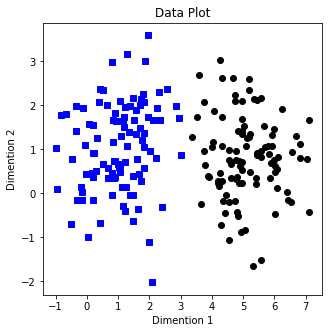

In [7]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('Data Plot')
plt.xlabel('Dimention 1')
plt.ylabel('Dimention 2')
plt.show();

In [9]:
ANNclassify = nn.Sequential(nn.Linear(2,1),nn.ReLU(),nn.Linear(1,1),nn.Sigmoid())
ANNclassify

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
  (3): Sigmoid()
)

In [11]:
learningrate=0.01

lossfun = nn.BCELoss()
optimizer=torch.optim.SGD(ANNclassify.parameters(),learningrate)

In [13]:
numepochs = 1000

losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    
    yHat = ANNclassify(data)
    
    loss=lossfun(yHat,labels)
    losses[epochi]=loss
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

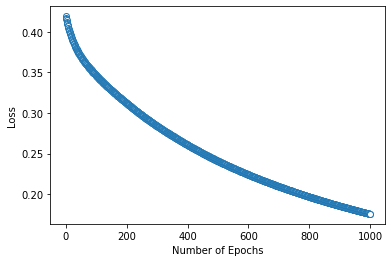

In [14]:
plt.plot(losses.detach(),'o',markerfacecolor='w')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.show();

In [15]:
predictions=ANNclassify(data)

predlabels = predictions>0.5

missclassified = np.where(predlabels != labels)[0]

totalacc = 100-100*len(missclassified)/(2*nPerClust)

print('Final Accuracy: %g%%' %totalacc)

Final Accuracy: 97.5%


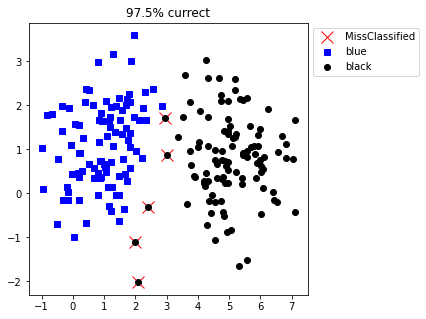

In [18]:
fig = plt.figure(figsize=(5,5))
plt.plot(data[missclassified,0],data[missclassified,1],'rx',markersize=12)
plt.plot(data[np.where(~predlabels)[0],0],data[np.where(~predlabels)[0],1],'bs')
plt.plot(data[np.where(predlabels)[0],0],data[np.where(predlabels)[0],1],'ko')

plt.legend(['MissClassified','blue','black'],bbox_to_anchor=(1,1))
plt.title(f'{totalacc}% currect')
plt.show()